<a href="https://colab.research.google.com/github/ChandraMedhika/CPP/blob/main/UAS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
!pip3 install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.3 MB/s 


In [ ]:
import pygad

In [ ]:
df = pd.read_csv("/russia_losses_equipment.csv")
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       107 non-null    object 
 1   day                        107 non-null    int64  
 2   aircraft                   107 non-null    int64  
 3   helicopter                 107 non-null    int64  
 4   tank                       107 non-null    int64  
 5   APC                        107 non-null    int64  
 6   field artillery            107 non-null    int64  
 7   MRL                        107 non-null    int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      107 non-null    int64  
 11  naval ship                 107 non-null    int64  
 12  anti-aircraft warfare      107 non-null    int64  
 13  special equipment          88 non-null     float64

In [ ]:
df.shape

(107, 18)

In [ ]:
df.count()

date                         107
day                          107
aircraft                     107
helicopter                   107
tank                         107
APC                          107
field artillery              107
MRL                          107
military auto                 65
fuel tank                     65
drone                        107
naval ship                   107
anti-aircraft warfare        107
special equipment             88
mobile SRBM system            36
vehicles and fuel tanks       42
cruise missiles               42
greatest losses direction     18
dtype: int64

In [ ]:
df.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,65.000000,65.000000,107.000000,107.000000,107.000000,88.000000,36.000000,42.000000,42.000000
mean,55.000000,149.971963,134.186916,840.728972,2189.308411,394.766355,131.663551,1047.507692,69.323077,224.981308,8.112150,63.841121,33.363636,3.944444,2154.523810,106.238095
std,31.032241,60.433256,42.330713,393.338482,829.829869,191.901241,60.360231,466.162060,7.545917,198.105222,3.991328,27.030084,12.423728,0.333333,184.185119,13.982235
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,1796.000000,84.000000
25%,28.500000,104.500000,124.000000,523.500000,1587.500000,273.500000,81.000000,600.000000,60.000000,46.000000,4.000000,47.000000,25.000000,4.000000,2002.500000,94.000000
50%,55.000000,169.000000,150.000000,802.000000,2063.000000,386.000000,132.000000,1178.000000,73.000000,158.000000,8.000000,67.000000,31.000000,4.000000,2186.000000,105.500000
75%,81.500000,200.000000,164.500000,1224.000000,2966.000000,566.000000,195.000000,1437.000000,76.000000,421.500000,13.000000,89.000000,43.000000,4.000000,2286.250000,120.000000
max,108.000000,212.000000,178.000000,1419.000000,3466.000000,712.000000,222.000000,1701.000000,76.000000,579.000000,13.000000,97.000000,54.000000,4.000000,2448.000000,125.000000


In [ ]:
df.isnull().sum()

date                          0
day                           0
aircraft                      0
helicopter                    0
tank                          0
APC                           0
field artillery               0
MRL                           0
military auto                42
fuel tank                    42
drone                         0
naval ship                    0
anti-aircraft warfare         0
special equipment            19
mobile SRBM system           71
vehicles and fuel tanks      65
cruise missiles              65
greatest losses direction    89
dtype: int64

In [ ]:
tanggal = df['date']
tanggal

0      2022-02-25
1      2022-02-26
2      2022-02-27
3      2022-02-28
4      2022-03-01
          ...    
102    2022-06-07
103    2022-06-08
104    2022-06-09
105    2022-06-10
106    2022-06-11
Name: date, Length: 107, dtype: object

In [ ]:
hari = df['day']
hari

0        2
1        3
2        4
3        5
4        6
      ... 
102    104
103    105
104    106
105    107
106    108
Name: day, Length: 107, dtype: int64

In [ ]:
pesawat = df['aircraft']
pesawat

0       10
1       27
2       27
3       29
4       29
      ... 
102    212
103    212
104    212
105    212
106    212
Name: aircraft, Length: 107, dtype: int64

In [ ]:
heli = df['helicopter']
heli

0        7
1       26
2       26
3       29
4       29
      ... 
102    177
103    178
104    178
105    178
106    178
Name: helicopter, Length: 107, dtype: int64

In [ ]:
tank = df['tank']
tank

0        80
1       146
2       150
3       150
4       198
       ... 
102    1390
103    1393
104    1398
105    1409
106    1419
Name: tank, Length: 107, dtype: int64

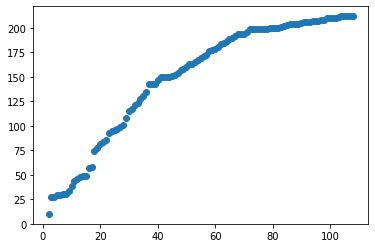

In [ ]:
plt.scatter(df['day'],df['aircraft'])
plt.show()

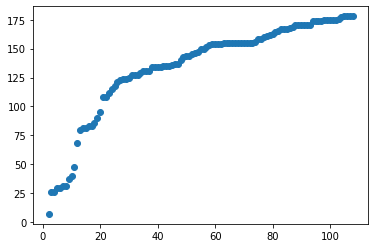

In [ ]:
plt.scatter(df['day'],df['helicopter'])
plt.show()

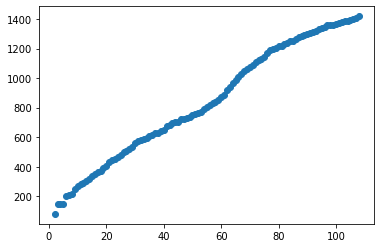

In [ ]:
plt.scatter(df['day'],df['tank'])
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.tank,df.helicopter, test_size = 0.2)

In [ ]:
function_inputs = x_train
desired_output = 44

def fitness_func(solution, solution_idx):
    output = np.sum(solution*function_inputs)
    fitness = 1.0 / np.abs(output - desired_output)
    return fitness


    
fitness_function = fitness_func

num_generations = 50
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [ ]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

In [ ]:
ga_instance.run()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = np.sum(np.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [-0.38868565  5.14238483 -1.4616024  -0.71178463 -0.93064268  2.18787263
 -0.56666731  1.73896518 -3.11096388 -1.56084992 -1.84626669  3.22506208
 -0.88819384 -0.8137917  -0.08467383  2.31589587 -1.28627804  2.04435797
 -0.84726236  3.064485   -0.9092125  -1.27594737  0.87331    -0.34021118
 -1.00797919 -2.14830997 -1.16849835 -0.09990209 -1.39049269  1.09202789
  1.86432597 -2.65603989  0.2577237  -1.19847495 -0.29841891 -1.42963075
  4.28804941  1.05331543 -3.55797511  0.99063744 -2.42227392  0.16842285
  0.03015671 -1.6226089   2.05706371  3.59440343  1.07179889 -0.32953273
 -5.1737364   2.39215781  5.05046676 -1.09096517  3.94568156 -1.41906471
 -2.39919704  2.39081563 -1.00267551  4.47685467  2.63233186  0.60071852
 -2.16972289  1.94898641  3.32166646  3.99999951  3.49668574 -1.10627939
  1.48422836 -3.33817969 -2.02059823 -0.6443189   4.80131141  4.1558489
  4.9690962  -2.6946499   2.21896364  0.81284815  0.40143992  0.46309147
  0.40900289 -0.83

In [ ]:
varx = [ ]
for i in range(len(pesawat)):
  varx.append([pesawat[i],heli[i],tank[i]])
varx

[[10, 7, 80],
 [27, 26, 146],
 [27, 26, 150],
 [29, 29, 150],
 [29, 29, 198],
 [30, 31, 211],
 [30, 31, 217],
 [33, 37, 251],
 [39, 40, 269],
 [44, 48, 285],
 [46, 68, 290],
 [48, 80, 303],
 [49, 81, 317],
 [49, 81, 335],
 [57, 83, 353],
 [58, 83, 362],
 [74, 86, 374],
 [77, 90, 389],
 [81, 95, 404],
 [84, 108, 430],
 [86, 108, 444],
 [93, 112, 450],
 [95, 115, 466],
 [96, 118, 476],
 [97, 121, 498],
 [99, 123, 509],
 [101, 124, 517],
 [108, 124, 530],
 [115, 125, 561],
 [117, 127, 575],
 [121, 127, 582],
 [123, 127, 586],
 [127, 129, 597],
 [131, 131, 605],
 [135, 131, 614],
 [143, 131, 625],
 [143, 134, 631],
 [143, 134, 644],
 [147, 134, 647],
 [150, 134, 676],
 [150, 135, 684],
 [150, 135, 698],
 [150, 135, 700],
 [151, 136, 705],
 [152, 137, 722],
 [154, 137, 725],
 [157, 140, 732],
 [158, 143, 739],
 [160, 144, 753],
 [163, 144, 756],
 [163, 145, 762],
 [165, 146, 773],
 [167, 147, 790],
 [169, 150, 802],
 [171, 150, 815],
 [172, 151, 829],
 [176, 153, 838],
 [177, 154, 854],
 [1

In [ ]:
from datetime import date
ganda = LinearRegression().fit(varx,hari)

In [ ]:
aa = ganda.intercept_
bb = ganda.coef_
rr = ganda.score(varx,hari)
print(aa)
print(bb)
print(rr)

-9.571066576172683
[-0.01276516 -0.02148193  0.08250944]
0.9913912749772169


In [ ]:
X_1 = int(input("Masukkan banyaknya pesawat : "))
X_2 = int(input("Masukkan banyaknya helicopter : "))
X_3 = int(input("Masukkan banyaknya tank : "))
evaluasi = -9.16 + (0.011*X_1)-(0.032*X_2)+(0.079*X_3)
evaluasi

Masukkan banyaknya pesawat : 212
Masukkan banyaknya helicopter : 178
Masukkan banyaknya tank : 1419


99.577